CODE FOR SPLITTING DATASET (CONTAINED AS SEPERATE CATAGORIZED IMAGES IN SUBDIRECTORIES OF PATH)

In [1]:
import os
import shutil
import pandas as pd

In [2]:
def prep_data(path):
    """formats directory for use as training, validation, and testing data
"""
    #check if train, test folders exist
    if not os.path.exists(path + '/train'):
        os.mkdir(path + '/train')
    if not os.path.exists(path + '/test'):
        os.mkdir(path + '/test')
    if not os.path.exists(path + '/val'):
        os.mkdir(path + '/val')

    
    subfolders = os.listdir(path)

    #check if subfolder is not = train, test, .DS_Store
    n = 0
    length = len(subfolders)
    while n < length:
        if subfolders[n] == 'train' or subfolders[n] == 'test' or subfolders[n] == '.DS_Store' or subfolders[n] == 'val':
            subfolders.pop(n)
            n -= 1
            length -= 1
        n += 1

    for folder in subfolders:
        file_list = os.listdir(path +'/'+ folder)
        for i in file_list:
            if i == '.DS_Store':
                file_list.remove(i)
        
        length = len(file_list)

        train_amount = int(length * .8)

        val_amount = int(train_amount * .2)

        train_amount = int(train_amount)
        val_amount = int(val_amount)
        ntrain_amount = train_amount - val_amount

        train_list = file_list[:ntrain_amount]

        val_list = file_list[ntrain_amount:train_amount]

        test_list = file_list[train_amount:]

        if not os.path.exists(path + '/train/' + folder):
            os.mkdir(path + '/train/' + folder)
        if not os.path.exists(path + '/test/' + folder):
            os.mkdir(path + '/test/' + folder)
        if not os.path.exists(path + '/val/' + folder):
            os.mkdir(path + '/val/' + folder)
        
        
        for file in train_list:
            #copy files to train subfolder
            shutil.copy(path +'/'+ folder + '/' + file, path + '/train/' + folder + '/' + file)
        for file in test_list:
            #copy files to test subfolder
            shutil.copy(path +'/'+ folder + '/' + file, path + '/test/' + folder + '/' + file)
        for file in val_list:
            #copy files to test subfolder
            shutil.copy(path +'/'+ folder + '/' + file, path + '/val/' + folder + '/' + file)

MAKING A DATAFRAME CONTAINING:
    - IMAGE NAMES
    - IMAGE PATHS
    - IMAGE CATAGORIES (LABELS)
    

In [3]:
def make_df(path):
    #check if path exists
    if os.path.exists(path):
        print("Directory exists")
    else:   
        print("Directory does not exist")

    #create storage lists    
    names = []
    image_paths = []
    catagory = []

    #create a list of the subdirectories in the path
    cats = os.listdir(path)
    
    #remove the .DS_Store file from the list
    for i in cats:
        if i == '.DS_Store':
            cats.remove(i)
    
    #iterate through the subdirectories and create a list of the images metadata
    for i in cats:
        cat_path = os.path.join(path, i)
        cat_list = os.listdir(cat_path)
        #print(cat_list)
        #cat_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
        for j in cat_list:
            if j == '.DS_Store':
                cat_list.remove(j)
        cat_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
        n = 0        
        for j in cat_list:
            image_path = os.path.join(cat_path, j)
            image_name = j
            image_catagory = i
            names.append(image_name)
            image_paths.append(image_path)
            catagory.append(image_catagory)
            
            n += 1
    
    #create a dictionary of the lists

    
    data = {'names': names, 'image_paths': image_paths, 'catagory': catagory}
    #create a dataframe from the dictionary
    df = pd.DataFrame(data)
    return df

In [4]:
def make_simple_df(path):
    if os.path.exists(path):
        print("Directory exists")
    else:
        print("Directory does not exist")
    
    names = []
    
    images = os.listdir(path)
    for i in images:
        if i == '.DS_Store':
            images.remove(i)
    images.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    for i in images:
        names.append(i)
        
    data = {'names': names}
    df = pd.DataFrame(data)
    return df
    

In [5]:
def export(df, name, path):
    #check if path exists
    if os.path.exists(path):
        print("Directory exists")
    else:   
        print("Directory does not exist")
    #export dataframe to csv
    df.to_csv(path +'/' + name + '.csv')
    print('exported dataframe to csv')

In [8]:
pre_path = '/Users/david/Desktop/shelter_dogs_research/Data/trial1_pup1'
path = pre_path + '/cropped'


>>>>>>>>>>>>SPLIT DATA INTO TRAIN VAL AND TEST SETS

In [9]:
prep_data(path)

>>>>>>>>>>>CREATE DATAFRAMES FOR EACH

In [11]:
train_df = make_df(path + '/train')

Directory exists


In [12]:
val_df = make_df(path + '/val')

Directory exists


In [13]:
test_df = make_df(path + '/test')

Directory exists


>>>>>>>>>EXPORT THOSE DATAFRAMES AS .CSV FILES

In [14]:
export(train_df, 'train_df', pre_path)
export(val_df, 'val_df', pre_path)
export(test_df, 'test_df', pre_path)

Directory exists
exported dataframe to csv
Directory exists
exported dataframe to csv
Directory exists
exported dataframe to csv


>>>>>>>>>CREATE DATASETS

In [26]:
training_data = CustomImageDataset(
    annotations_file = (pre_path + '/train_df.csv'), 
    img_dir = (path + '/train')
    )

In [27]:
validation_data = CustomImageDataset(
    annotations_file = (pre_path + '/val_df.csv'), 
    img_dir = (path + '/val')
    )

In [28]:
testing_data = CustomImageDataset(
    annotations_file = (pre_path + '/test_df.csv'), 
    img_dir = (path + '/test')
    )

>>>>>>>>>>>>>>>>>CREATE DATALOADERS

In [29]:
from torch.utils.data import DataLoader

In [30]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

>>>>>>>>>>>>>>>>>>TEST DATALOADER

Feature batch shape: torch.Size([64, 1, 500, 500])
train labels size :  64


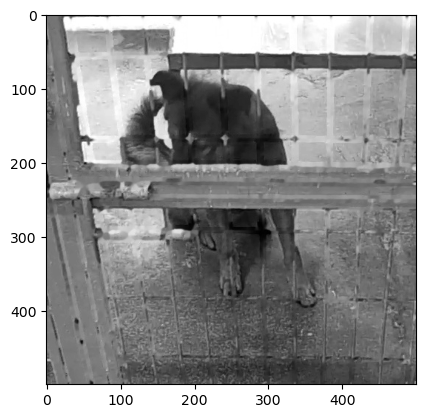

Label: sitting


In [33]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
#print(f"Labels batch shape: {train_labels.size()}")
print('train labels size : ', len(train_labels))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
